# Taller 2 - MLOps: Palmer Penguins

## Entrenamiento de Modelos desde el Notebook

En este notebook realizaremos el proceso completo de carga de datos, preprocesamiento y entrenamiento de los modelos Random Forest y SVM.

## Paso 1: Configuración del entorno
Agregamos el directorio raíz al path para poder importar nuestros módulos de `src`.

In [1]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Agregar el directorio raíz al path
sys.path.append(os.path.abspath('..'))

## Paso 2: Carga y Limpieza de Datos
Usamos la función `load_and_clean_data` definida en `src.preprocessing` que ya está configurada para leer de `data/penguins.csv`.

In [2]:
from src.preprocessing import load_and_clean_data

# Cambiamos el directorio de trabajo temporalmente para que encuentre la carpeta data/ si es necesario,
# o simplemente dejamos que la función lo maneje si estamos en la raíz del contenedor.
df = load_and_clean_data()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


## Paso 3: Visualización Exploratoria

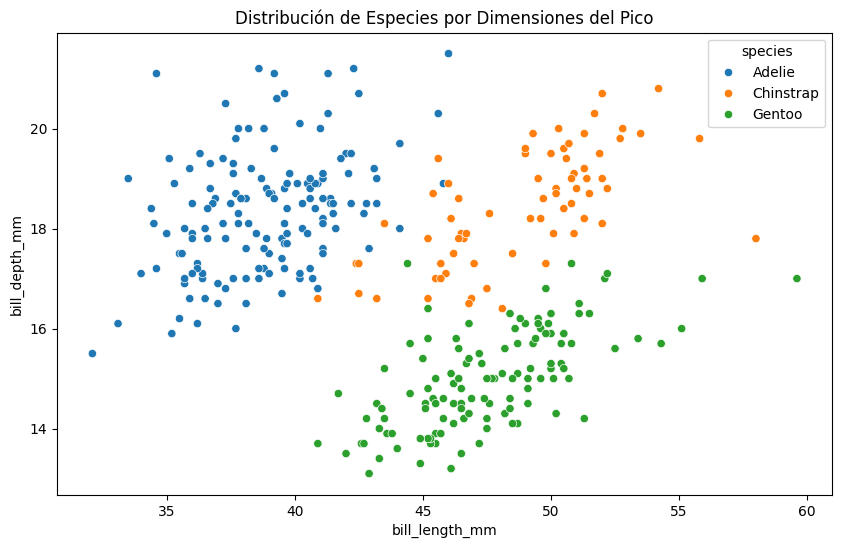

In [3]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.title('Distribución de Especies por Dimensiones del Pico')
plt.show()

## Paso 4: Entrenamiento de los Modelos
Ejecutamos el proceso de entrenamiento completo usando el módulo `src.train`.

In [4]:
from src.train import main as train_main

# Ejecutamos la función principal de entrenamiento
train_main()

2026-02-23 16:58:30,987 [INFO] Cargando datos desde /app/data/penguins.csv...
2026-02-23 16:58:30,992 [INFO] Dimensiones originales: (344, 7)
2026-02-23 16:58:30,993 [INFO] Dimensiones tras eliminar nulos: (334, 7)
2026-02-23 16:58:31,038 [INFO] Entrenando Random Forest...
2026-02-23 16:58:31,156 [INFO] Accuracy Random Forest: 1.0000
2026-02-23 16:58:31,156 [INFO] Entrenando SVM con StandardScaler...
2026-02-23 16:58:31,169 [INFO] Accuracy SVM: 1.0000
2026-02-23 16:58:33,320 [INFO] Encoder guardado: /app/models/label_encoder_island.pkl
2026-02-23 16:58:33,323 [INFO] Encoder guardado: /app/models/label_encoder_sex.pkl
2026-02-23 16:58:33,326 [INFO] Encoder guardado: /app/models/label_encoder_species.pkl
2026-02-23 16:58:33,348 [INFO] Métricas guardadas en /app/models/metrics.json
2026-02-23 16:58:33,349 [INFO] Entrenamiento finalizado y artefactos guardados.


## Paso 5: Verificación de Métricas
Leemos los resultados guardados en `models/metrics.json`.

In [5]:
import json

with open('../models/metrics.json', 'r') as f:
    metrics = json.load(f)

print(f"Accuracy Random Forest: {metrics['rf']['accuracy']:.4f}")
print(f"Accuracy SVM: {metrics['svm']['accuracy']:.4f}")

Accuracy Random Forest: 1.0000
Accuracy SVM: 1.0000
